In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
housing_data=pd.read_csv('housing.csv')

## 무작위 추출

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [4]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


## 층화 추출법

- 모집단을 여러개의 층으로 구분하여, 각 층에서 n개씩 랜덤하게 추출하는 방법

- 순수한 무작위 샘플링 방식은 데이터의 크기가 충분히 크지 않은 상황 등 샘플링 편향이 발생할 수 있는 가능성이 생길수 있습니다. 

- 전체 데이터를 계층별 그룹으로 나눈뒤 . 테스트 세트가 전체 데이터의 각 계층의 계수 비율 만큼 샘플링 합니다.

In [14]:
#example

In [4]:
X = np.array([[1,2],[3,4],[1,2],[3,4],[1,2],[3,4]])
y = np.array([0,0,0,1,1,1])
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

split.split(X,y)

<generator object BaseShuffleSplit.split at 0x000001F760BE4510>

In [5]:
X = np.array([[1,2],[3,4],[1,2],[3,4],[1,2],[3,4]])
y = np.array([0,0,0,1,1,1])
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for train_index , test_index in split.split(X,y):
    print('train_index : ', train_index, 'test_index : ', test_index)

train_index :  [1 5 0 4] test_index :  [3 2]
train_index :  [3 0 2 4] test_index :  [1 5]
train_index :  [0 5 1 4] test_index :  [2 3]
train_index :  [2 3 5 1] test_index :  [4 0]
train_index :  [1 0 3 5] test_index :  [2 4]
train_index :  [1 4 0 3] test_index :  [5 2]
train_index :  [1 5 0 4] test_index :  [3 2]
train_index :  [5 3 0 2] test_index :  [1 4]
train_index :  [1 4 3 0] test_index :  [2 5]
train_index :  [2 3 1 5] test_index :  [0 4]


In [6]:
#pd.cut 연속형 변수를 잘라줌
import numpy as np
housing_data['income_cat']=pd.cut(housing_data.median_income,bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [7]:
housing_data.income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

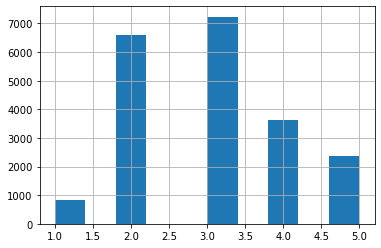

In [8]:
housing_data.income_cat.hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [11]:
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index] 
    strat_test_set = housing_data.loc[test_index]

In [12]:
print(train_index)

[17606 18632 14650 ... 13908 11159 15775]


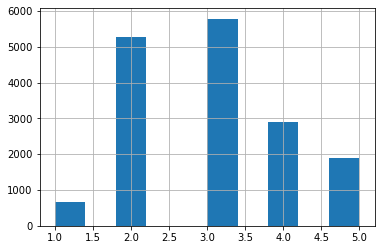

In [13]:
strat_train_set.income_cat.hist()

In [14]:
#밑에서 사용할 imputer를 위해서 범주형 변수 income_cat 삭제
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [15]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

#### 2.5.1 데이터 정제

# 결측치 처리

- 변수를 삭제
- 샘플을 삭제
- 대체

## imputation

- 1) 범주형 변수 삭제
- 2) imputation 결측치 처리
- 3) 범주형 변수 -> OneHotEncoder 이용해서 변환

In [16]:
from sklearn.impute import KNNImputer

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [18]:
# 1) 범주형 변수 삭제
housing_num=housing.drop('ocean_proximity',axis=1)

In [ ]:
housing_num.head() # 번주형 변수가 삭제된 데이터

In [19]:
# 2) 결측치 처리
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X=imputer.fit_transform(housing_num)

In [20]:
type(X)

numpy.ndarray

In [21]:
# numpy 형식 -> pandas 
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

## 선형회귀
- input : 범주형 변수가 있는 경우
- dummy variable로 변환

In [22]:
# 3) 범주형 변수 변환
housing_cat=housing[['ocean_proximity']] # ['ocean_proximity']: DataFrame 유지 시키기 위해

In [23]:
type(housing_cat)

pandas.core.frame.DataFrame

In [24]:
## ordinal -> OrdinalEncoder 
## nominal -> OneHotEncoder

In [25]:
# 범주형 변수 -> 수치형 값으로 바꿔 -> OneHot Encoder로 변환

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat)

In [27]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [15]:
# 4) 단위 표준화(scale)

In [17]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit_transform(housing_num)

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [30]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=3, weights="uniform")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.19062253],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.93947014],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.49477782],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.58103326],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.33216717],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.12963728]])

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # tuple(이름, 변환기, 적용될 열 이름 혹은 인덱스)
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
type(housing_prepared)

numpy.ndarray

## 2.6 모델선택과 훈련

### 2.6.1 validation approach

In [37]:
#Linear regression vs. decision tree (모델 비교)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg=LinearRegression()

In [40]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

- fit : 학습
- transform : 데이터 변환
- fit_trasform : 학습 -> 변환 (동시)
- predict 

In [42]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [43]:
some_data=housing.iloc[:5] # test input

In [44]:
some_labels=housing_labels.iloc[:5] # test output

In [45]:
some_data_prepared=full_pipeline.transform(some_data)

In [46]:
print(lin_reg.predict(some_data_prepared))

[209213.16520707 315596.96739534 209777.82144114  55783.92100833
 183210.18897242]


In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions) 

#training error

In [48]:
np.sqrt(lin_mse) #RMSE

68149.72832110235

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) #모델 학습

DecisionTreeRegressor()

In [67]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels, housing_predictions)
tree_rmse=np.sqrt(tree_mse) #training error

In [68]:
tree_rmse #과적합?

0.0

### 2.6.2 cross-validation

In [54]:
from sklearn.model_selection import cross_val_score

### Decision tree

In [82]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
score = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
np.mean(score)

-5070980072.338586

교차 검증 평균값으로 우리는 이 모델의 정확도가 대략 96%일 것으로 기대할 수 있음
- https://woolulu.tistory.com/70

In [71]:
np.sqrt(-score) #-RMSE

array([72044.63070624, 68990.67811315, 70712.87843822, 71302.70361792,
       69970.02043696, 74983.3121538 , 67446.16748263, 70161.8403659 ,
       76510.53319832, 70936.35015386])

In [72]:
np.mean(np.sqrt(-score)) #평균적으로 편차가 7만달러가 된다

71305.9114667008

In [73]:
np.std(np.sqrt(-score)) #평균적으로 표준편차가 2천달러가 된다

2549.4465273023034

### Linear regression

In [74]:
lin_reg=LinearRegression()
score = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [79]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [80]:
np.sqrt(-scores) #RMSE

array([71768.49867694, 68363.61386477, 70252.20624758, 71295.39358626,
       70381.55104915, 74519.97936186, 72673.53599711, 70082.29574252,
       75305.66980289, 70489.73338766])

In [78]:
np.mean(np.sqrt(-score)) #선형회귀가 조금 더 좋네?

68470.98067306033